# Team #3 MidTerm Project
# Team Manager - Bryton McClintock 
# Team Members Troy Frost, Jeff Kryszewski, Kayoko Lewis, Adam Martinez, Bryton McClintock
## Step 1: Bryton
## Background
1. We will be using the suv dataset in this ML project
2. In this dataset, we want to process the dataset, and prepare it to be used in a classification ML model
3. The target variable (Purchased) is a category of 1 (Purchased) and 0 for (Not Purchased)

## Objectives:
1. To create an ML model for predicting the rate of of purchases
2. To decide which variables can affect the purchase rate

## Step 2: Bryton
1. Importing libraries
2. Reading the dataset

In [170]:
%pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [171]:
#first you need to install them
%pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [172]:
%pip install pandas
%pip install scikit-learn 

Note: you may need to restart the kernel to use updated packages.


In [3]:
# 1.  importing needed libraries
import numpy as np  # this library handles numeric values
import pandas as pd # this library handles both numeric and text (str)
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split




In [ ]:
# 2. Reading (Loading) the dataset
df = pd.read_csv('suv_dataset.csv')


## Step 3: Troy&Kayoko
1. Check your dataset by the head() and tail() functions
2. Peforming EDA (Exploratory Data Analysis)
    - Basic Data Exploration
    - Advanced Functions in data processing
    - Missing Values
    - Visualization
    - EDA Summary

In [ ]:
# let's check the first 5 rows of a dataset
df.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000,0
1,15810944,Male,35.0,20000,0
2,15668575,Female,26.0,43000,0
3,15603246,Female,27.0,57000,0
4,15804002,Male,19.0,76000,0


In [ ]:
# let's check the last 5 rows of a dataset
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46.0,41000,1
396,15706071,Male,51.0,23000,1
397,15654296,Female,50.0,20000,1
398,15755018,Male,36.0,33000,0
399,15594041,Female,49.0,36000,1


### Basic Data Exploration
1. Data Attributes: These attributes give us information about the dataset, there is no () after the attributes
]

In [ ]:
#let's see the total number of columns and rows in this dataset
df.shape


(400, 5)

In [ ]:
#ndim attribute gives us the dadtaset dimensionality (2d),
# this data set is tablular: columns and rows
df.ndim

2

In [ ]:
#total number of volues (rows * columns ) 891* 12
df.size

2000

In [ ]:
# the columns' names
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

## Thoughts at this point
1.  It is intereting to look at how to use the import fucntions to bring in libraries.(Troy)
2.  I like the use of !pip and %pip to install missing imports.(Troy)
3.  The mark up for this is very useful for html output.(Troy)
4.  the df variable is provding a helpful set of functions to use.(Troy)
5.  The head and tail functions give us useful data information.(Kayoko)
6.  Know the dimensions and size of the data is very helpful.(Kayoko)
7.  The use of markdown and cell execution is helpful for legibility.(Kayoko)
8.  The use of # sign for sections is helpful.(Kayoko)
9.  The overall approach to data exploration is useful.(Kayoko)
10. Seeing some samples of the data is helpufl to understand the data you are using.(Kayoko)


In [ ]:
#creating a copy of my dataset
suv = df.copy()
suv.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000,0
1,15810944,Male,35.0,20000,0
2,15668575,Female,26.0,43000,0
3,15603246,Female,27.0,57000,0
4,15804002,Male,19.0,76000,0


### Advanced functions for data processing


In [ ]:
# Let's get the dataset information
suv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           400 non-null    object 
 2   Age              390 non-null    float64
 3   EstimatedSalary  400 non-null    int64  
 4   Purchased        400 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 15.8+ KB


In [ ]:
#let's check the missing values in this dataset
suv.isnull().sum()


User ID             0
Gender              0
Age                10
EstimatedSalary     0
Purchased           0
dtype: int64

In [ ]:
# the numeric summary of the dataset
suv.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,390.000000,400.000000,400.000000
mean,1.569154e+07,37.764103,69742.500000,0.357500
std,7.165832e+04,10.531175,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,30.000000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
# duplicated values
suv.duplicated().sum()

0

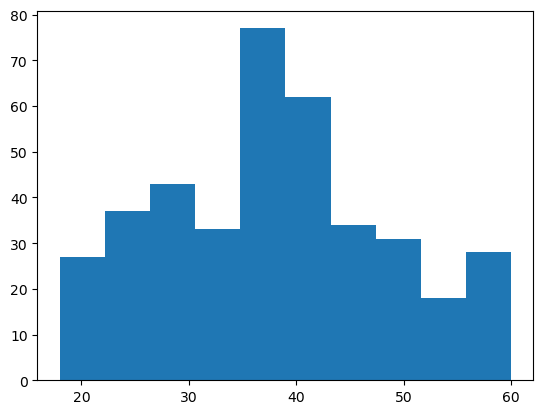

In [ ]:
### Data Visualization 
## What is data visualization?Complete this question:
# Data visualization is the process of using visual depctions of the data. This allows you to see trends, outliers, and patterns in data that may be difficult to spot in a textual form.

import matplotlib.pyplot as plt
import seaborn as sns
# 2.  Plotting the histogram
plt.hist(suv['Age']);
plt.show()


<Axes: xlabel='Purchased', ylabel='count'>

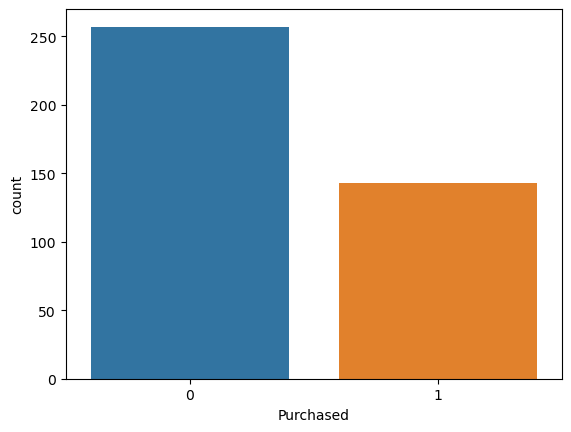

In [ ]:
sns.countplot( x='Purchased', data=suv)

<Axes: xlabel='Purchased', ylabel='count'>

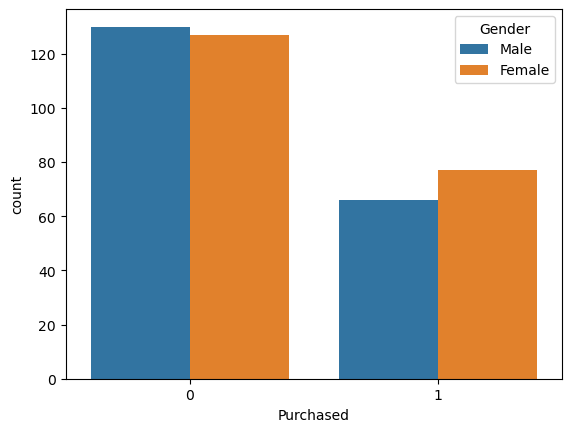

In [ ]:
sns.countplot(x='Purchased',hue='Gender', data=suv)


## Step 4: Data Pre-Processing or Data Preparation (Jeff Kryszewski)
* In this section we will cover how to prepare the dataset of the building of our ML Model. Before model building, two conditions need to be taken care of:
1. The missing values: we cannot create or build an ML model if there is any missing value in the dataset
2. Data type (dtype): the only type of data that allow us to build an ML model is the numerical type of data. If we have any other types such as category, object, str, we should convert them int numerical type of data. This process is called "Data Transformation"

Observation:
* After examining trhe dataset for missing values we found out that there are some variables that are not adding any extra knowledge ot our model predi8ction. these features do nott need to be treated for missing values or for data transformation.
* therefore we can easily drop them since we dont use them in the model building process
* very important be very careful with dropping features. you need to maike sure that the dropped features are not adding any knowledge or affect to the model.

## Condition 1: Missing values
* dropping the variable that dont add any knowledge to model performance


In [ ]:
# lets drop the featuers that we dont use in the model building
# axis=1 shows that the drop is happening at the column level

suv.drop(['User ID'], axis=1, inplace=True)

In [ ]:
# let's see the columns now

suv.isnull().sum()

Gender              0
Age                10
EstimatedSalary     0
Purchased           0
dtype: int64

On strategy of handling missing values is to drop the column if:

1. The variable column is not ciritical in building the model
2. The variable will not affect the model perormance(the final output of the model)

In this project, the "User ID" variables are not critical not effeictive in model building


In [ ]:
# one strategy in handling missing values is to drop them
#suv.drop(['Age'], axis=1, inplace=True)

In [ ]:
suv.isnull().sum()

Gender              0
Age                10
EstimatedSalary     0
Purchased           0
dtype: int64

In [ ]:
suv.isnull().sum()* 100/len(suv)

Gender             0.0
Age                2.5
EstimatedSalary    0.0
Purchased          0.0
dtype: float64

### As we can see, the only variable with missing values is the "Age" 
1. Another strategy in handling missing bvalues is to fill the missing values with the media or mean (avg) of the column
2. Here for taking care of the age column missing values, we use the median of the age oclumn to fill the missing values in that coluimn

In [ ]:
# lets fille the missing values of age feature by median
# this process is called imputation
 
suv['Age'] = suv['Age'].fillna(suv['Age'].median())

In [ ]:
suv.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

### Condidtion 1 has been handled. There are no missing values in the dataset that will be used in the model building step.
### Condition 2: Data Types
* Data type (dtype): the only type of data that allow us to build an ML model is the numerical type of dtat. if we have nay other types such as caategory , object, str we should confert them int numerical type of data. This process is called "Data Transformation"

### To meet condition 2, we need to change any variable that is dtype (data type) is not numeric into anumeric one.
* The "gender" feature in this dataset is an object data type
* How do we transofrm the female/male data type in the sex solumn
* We need to change femaile/male to 1s and )s

1. We use a technica called onehotencoding or get dummies
2. in this project we will be using Pandas get_dummies method


In [ ]:
suv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           400 non-null    object 
 1   Age              400 non-null    float64
 2   EstimatedSalary  400 non-null    int64  
 3   Purchased        400 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 12.6+ KB


### As we can see Gender valiable is the only one that is not numeric
* here are the steps in oconverrting an object variable to numeric one

In [ ]:
# 1. let's use the get dummies for sex feature
# and name the new dataset suv1
suv1 = pd.get_dummies(suv["Gender"])     
suv1            

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
395,1,0
396,0,1
397,1,0
398,0,1


In [ ]:
# 2. drop the first column and keep only one column
suv1 = pd.get_dummies(suv["Gender"], drop_first=True)
suv1

,Male
0,1
1,1
2,0
3,0
4,1
...,...
395,0
396,1
397,0
398,1


### As you can see under male: if we see 1 means the subject is male if 0 the subject is female this way we converted male and female to 1 and 0

In [ ]:
# 3. we need to add suv1 to the original suv dataset
suv = pd.concat([suv, suv1], axis=1)

In [ ]:
# we can see male in the suv deataset
suv.head(10)

,Gender,Age,EstimatedSalary,Purchased,Male
0,Male,19.0,19000,0,1
1,Male,35.0,20000,0,1
2,Female,26.0,43000,0,0
3,Female,27.0,57000,0,0
4,Male,19.0,76000,0,1
5,Male,27.0,58000,0,1
6,Female,37.0,84000,0,0
7,Female,32.0,150000,1,0
8,Male,25.0,33000,0,1
9,Female,35.0,65000,0,0


In [ ]:
# 4. now , we dont need the sex olumn anymore let's drop it
suv.drop ("Gender", axis=1, inplace=True)

In [ ]:

suv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              400 non-null    float64
 1   EstimatedSalary  400 non-null    int64  
 2   Purchased        400 non-null    int64  
 3   Male             400 non-null    uint8  
dtypes: float64(1), int64(2), uint8(1)
memory usage: 9.9 KB


In [ ]:
suv.head()

,Age,EstimatedSalary,Purchased,Male
0,19.0,19000,0,1
1,35.0,20000,0,1
2,26.0,43000,0,0
3,27.0,57000,0,0
4,19.0,76000,0,1


### Now the dataset is ready for model building step.



## Step 5: Building Classification Model (Adam Martinez)
- This project is a classification model
- Classification is a type of supervisted learning in which the target variable ia  categorical (class) valriable,
- The target variable in this dataset is the "purchased" variable and the purchased variable is a categorical (two different classes of purchased or not purchased)

The steps of build the model:
waht is model building? when we split the data into training and test sets, we train the model by the train set and then we apply the model to the test set to examine how the model is trained to predict the future event such as the suv purchasing  event.
1. Defining the training set (x) and test set (y)
- x is every independent variable and y is the target variable("purchased")
- generally speaking, 70% as x and 30% as y
2. splitting the dataset into x and y
3. building the model
4. fitting the model
5. the model-predicting

In [ ]:
suv.head()

,Age,EstimatedSalary,Purchased,Male
0,19.0,19000,0,1
1,35.0,20000,0,1
2,26.0,43000,0,0
3,27.0,57000,0,0
4,19.0,76000,0,1


In [ ]:
# 1. Define x and y
x = suv.drop('Purchased', axis=1)
y = suv['Purchased']

In [ ]:
# 2. split the data into train X and test Y

#before we do that we need to import the train_test_split from sklearn
from sklearn.model_selection import train_test_split

# split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

In [ ]:
x.head()


,Age,EstimatedSalary,Male
0,19.0,19000,1
1,35.0,20000,1
2,26.0,43000,0
3,27.0,57000,0
4,19.0,76000,1


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [ ]:
# shape total numer of rows and columns
suv.shape

(400, 4)

In [ ]:
# let's see shape of my training and testing data
print ('Shape of training set: ', x_train.shape)
print ('Shape of testing set: ', x_test.shape)

Shape of training set:  (280, 3)
Shape of testing set:  (120, 3)


In [ ]:
# 3. building the model

# before building the model, i need to import the libraries
from sklearn.linear_model import LogisticRegression

# Logistic regression is a nother name for the classification model
cl_model = LogisticRegression() # here i build the model

In [ ]:
## 4. fitting the model

cl_model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
# 5. let's make the model perform prediction
prediction = cl_model.predict(x_test)


In [ ]:
## Step 6: Evaluating the model
# before evaluating the perfomrance we need to  import the libraries 
# for the evaluation    tools for classification model   
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix,classification_report


In [ ]:
#getting the score for the model prediction
model_score = cl_model.score(x_test,y_test)
print(model_score)

0.6583333333333333


In [4]:
# let's get the measurements for all 4 scores
print ("Classification Report: \n", classification_report(y_test, prediction))
print ('Accuracy score: ', accuracy_score(y_test, prediction))
print ('Precision score: ', precision_score(y_test, prediction))
print ('Recall score: ', recall_score(y_test, prediction))
print ('F1 score: ', f1_score(y_test, prediction))


NameError: name 'y_test' is not defined

## Conclusion:Bryton
1. Overall the accuracy over 
2. This tabular dataset is efficient with each row as a data point and five columns 
3. Purchased looks to be the target variable, while other columns like Age,Gender,and EsitmatedSalary could be predictor variables to mel Purchased.
4.  Purchased is an interger column with 0/1 values, likely indicating if user made a purchase.
5. Age contains decimal/float values, in order to represent the age of the user
6. Cleaning up the data could have skewed some of the results
7. It may be worthwhile to compare the results against mean versus median to see what is better.
8. Other options might include remove instead of filling data missing.
9. Further test sampling could be useful to test against, by resplitting data.
10. Overall the scikit library is very useful in performing these model runs.


## End of MidTerm Team Project